<a href="https://colab.research.google.com/github/somsubhra999/nlpc8_text_classification/blob/master/keras_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [742]:
from keras import models, layers, backend
from keras.utils.np_utils import to_categorical
from keras.datasets import reuters
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from pprint import pprint
import matplotlib.pyplot as plt

Creating word index and reverse word index for the Reuters dataset and printing first 10 samples of each

In [743]:
word_index = reuters.get_word_index()
reverse_word_index = dict(map(reversed, word_index.items()))

pprint(dict(list(word_index.items())[0: 10]))
pprint(dict(list(reverse_word_index.items())[0: 10]))

{'chanthaburi': 20675,
 'degussa': 12089,
 'fawc': 16260,
 'hanging': 13796,
 'hermann': 8804,
 'localized': 20672,
 'mdbl': 10996,
 'refunding': 10997,
 'sation': 20673,
 'woods': 8803}
{8803: 'woods',
 8804: 'hermann',
 10996: 'mdbl',
 10997: 'refunding',
 12089: 'degussa',
 13796: 'hanging',
 16260: 'fawc',
 20672: 'localized',
 20673: 'sation',
 20675: 'chanthaburi'}


Loading data and associated labels. The entire dataset is split with a 0.2 ratio which means 80% of the data will be used for training and 20% for testing.

Words are ranked by how often they occur (in the training set) and only the `num_words` most frequent words are kept. For our training we are keeping only the top 3000 frequent words.

In [755]:
max_length = 3000
(x_train, y_train), (x_test, y_test) = reuters.load_data(test_split=0.1, num_words=max_length)

Tokenizing the sequences and converting the class vectors to binary class matrices (one-hot encoded).

In [756]:
tokenizer = Tokenizer(num_words=max_length)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

categories = len(y_train_cat[0])

print('Total categories = {}'.format(categories))

Total categories = 46


Padding zeroes to the end of each sequence to ensure that each sequence has a uniform length.

In [746]:
x_train = pad_sequences(x_train, maxlen=max_length, padding='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post')

Creating and adding layers to the model.

In [765]:
backend.clear_session()

model = models.Sequential()
model.add(layers.Dense(180, activation='relu', input_shape=(max_length,)))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(categories, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 180)               540180    
_________________________________________________________________
dropout_1 (Dropout)          (None, 180)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 46)                8326      
Total params: 548,506
Trainable params: 548,506
Non-trainable params: 0
_________________________________________________________________


Training the model for 5 epochs.

In [766]:
history = model.fit(x_train,
                    y_train_cat,
                    batch_size=110,
                    epochs=5,
                    validation_data=(x_test, y_test_cat))

Train on 10105 samples, validate on 1123 samples
Epoch 1/5
10105/10105 [==============================] - 1s 129us/step - loss: 1.5596 - accuracy: 0.6714 - val_loss: 1.1244 - val_accuracy: 0.7471
Epoch 2/5
10105/10105 [==============================] - 1s 115us/step - loss: 0.8808 - accuracy: 0.8050 - val_loss: 0.9203 - val_accuracy: 0.7898
Epoch 3/5
10105/10105 [==============================] - 1s 117us/step - loss: 0.6461 - accuracy: 0.8559 - val_loss: 0.8401 - val_accuracy: 0.8077
Epoch 4/5
10105/10105 [==============================] - 1s 115us/step - loss: 0.4969 - accuracy: 0.8901 - val_loss: 0.7991 - val_accuracy: 0.8130
Epoch 5/5
10105/10105 [==============================] - 1s 115us/step - loss: 0.3992 - accuracy: 0.9095 - val_loss: 0.8057 - val_accuracy: 0.8201


Evaluating test data

In [767]:
results = model.evaluate(x_test, y_test_cat, batch_size=128)
print("test loss = {}\ntest accuracy = {}".format(results[0], results[1]))

1123/1123 [==============================] - 0s 50us/step
test loss = 0.8056809591164253
test accuracy = 0.8201246857643127


Plotting model loss and accuracy charts

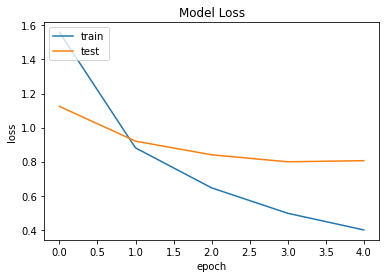

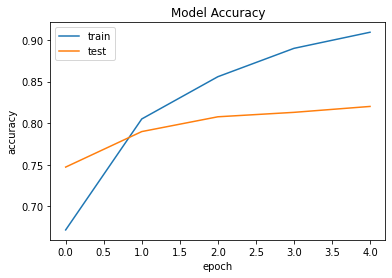

In [768]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()